# Linear and logistic regression

## 1. Business Understanding

## 2. Data Understanding

## 3. Data Preparation

In [21]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
X = pd.DataFrame(real_estate_valuation.data.features)
y = pd.DataFrame(real_estate_valuation.data.targets)

## 4. Modeling

### 4.1 Linear regression

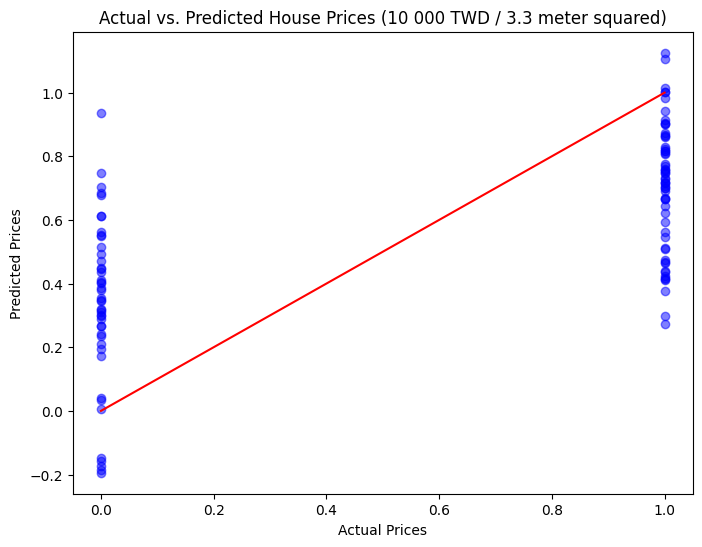

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Ideal 1:1 line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices (10 000 TWD / 3.3 meters squared)")
plt.show()

### 4.2 Logistic regression

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Calculate the average house price of unit area
average = y['Y house price of unit area'].mean()

# Map values to 0 and 1 based on the average
y['Y house price of unit area'] = y['Y house price of unit area'].apply(lambda x: 1 if x >= average else 0)

# Standardize the input variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and train the logistic regression model
reg = LogisticRegression(solver='lbfgs')
reg.fit(X_scaled, y['Y house price of unit area'].values.ravel())

y_pred_log = cross_val_predict(estimator=reg, X=X, y=y, cv=10)

cm = confusion_matrix(y, y_pred_log)
accuracy = accuracy_score(y, y_pred_log)

print("Accuracy: %0.2f" % accuracy)
print("Confusion Matrix:\n", cm)

In [ ]:
# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## 5. Evaluation

In [24]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

Mean absolute error: 5.63


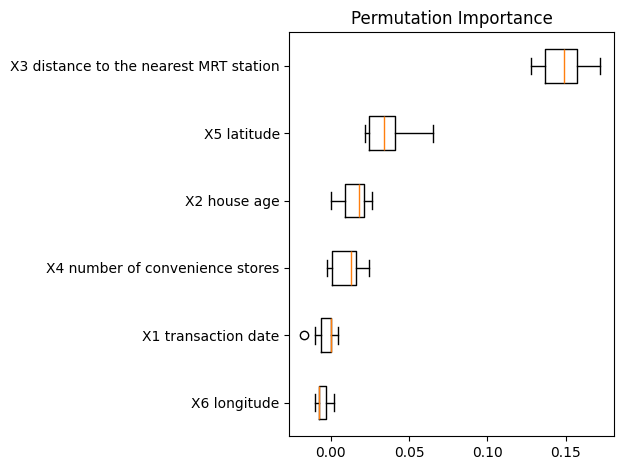

In [26]:
# feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X_scaled, y, n_repeats=10, scoring="accuracy", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()


## 6. Deployment
